In [151]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [152]:
df = pd.read_csv("HR_comma_sep.csv")

In [153]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales  salary  
0                          0    sales     low  
1                          0    sales  medium  
2                          0    sales  medium  
3                          0    sales     low  
4                          0    sales     low  
...                      ...      ...     ...  
14994                      0  support     low  
14995                      0  support     low  
14996                      0  support     low  
14997                      0  support     low  
14998                      0  support     low  

[14999 rows x 10 columns]

In [154]:
df.columns 

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary'],
      dtype='object')

In [155]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [156]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [157]:
df['left'].unique()

array([1, 0])

In [158]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [159]:
df.groupby('salary').sum()

satisfaction_level  last_evaluation  number_project  \
salary                                                        
high                788.55           871.25            4660   
low                4395.11          5245.70           27800   
medium             4008.23          4623.86           24582   

        average_montly_hours  time_spend_company  Work_accident  left  \
salary                                                                  
high                  247236                4568            192    82   
low                  1470491               25154           1040  2172   
medium               1297827               22748            937  1317   

        promotion_last_5years  
salary                         
high                       72  
low                        66  
medium                    181

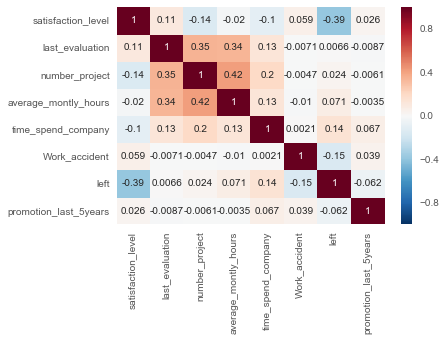

In [160]:
sns.heatmap(df.corr(), vmax=1, annot=True)

In [229]:
ct = pd.crosstab (df.satisfaction_level, df.left)

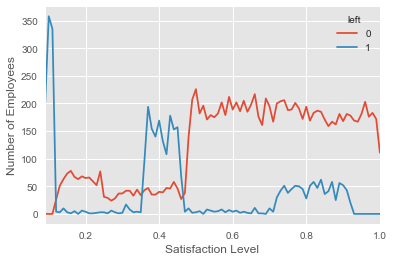

In [230]:
ax = ct.plot()
ax.set_ylabel("Number of Employees")
ax.set_xlabel("Satisfaction Level")

In [161]:
c = df.salary

In [162]:
c.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [163]:
X = df [['satisfaction_level', 'left', 'number_project', 'average_montly_hours', 'time_spend_company']]

In [164]:
X

satisfaction_level  left  number_project  average_montly_hours  \
0                    0.38     1               2                   157   
1                    0.80     1               5                   262   
2                    0.11     1               7                   272   
3                    0.72     1               5                   223   
4                    0.37     1               2                   159   
...                   ...   ...             ...                   ...   
14994                0.40     1               2                   151   
14995                0.37     1               2                   160   
14996                0.37     1               2                   143   
14997                0.11     1               6                   280   
14998                0.37     1               2                   158   

       time_spend_company  
0                       3  
1                       6  
2                       4  
3                       5  
4                       3  
...                   ...  
14994                   3  
14995                   3  
14996                   3  
14997                   4  
14998                   3  

[14999 rows x 5 columns]

In [165]:
c = df.salary

In [166]:
c.unique()

array(['low', 'medium', 'high'], dtype=object)

In [167]:
cs = pd.get_dummies(c, prefix = None)

In [168]:
cs

high  low  medium
0         0    1       0
1         0    0       1
2         0    0       1
3         0    1       0
4         0    1       0
...     ...  ...     ...
14994     0    1       0
14995     0    1       0
14996     0    1       0
14997     0    1       0
14998     0    1       0

[14999 rows x 3 columns]

# Low#

In [169]:
model_low = linear_model.LogisticRegression().\
    fit(X, cs.low)

print model_low.coef_
print model_low.intercept_

[[  3.09336588e-02   6.92938580e-01   1.65382147e-02  -3.07145772e-04
   -8.76256978e-02]]
[ 0.07270141]


In [170]:
model_low.score(X, cs.low)

0.56377091806120405

In [171]:
logit_hat_low = model_low.intercept_ + \
    (X * model_low.coef_[0]).sum(axis = 1)

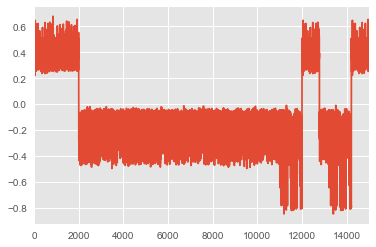

In [172]:
logit_hat_low.plot()

In [173]:
((logit_hat_low >= 0) == (cs.low == 1)).sum()

8456

In [174]:
((logit_hat_low >= 0) == (cs.low == 1)).mean()

0.56377091806120405

In [175]:
odds_hat_low = np.exp(logit_hat_low)

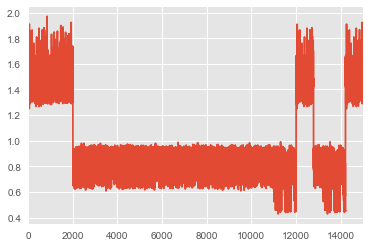

In [176]:
odds_hat_low.plot()

In [177]:
((odds_hat_low >= 1) == (cs.low == 1)).sum()

8456

In [178]:
((odds_hat_low >= 1) == (cs.low == 1)).mean()

0.56377091806120405

In [179]:
p_hat_low = odds_hat_low / (1 + odds_hat_low)

In [180]:
p_hat_low

0        0.622312
1        0.566320
2        0.610821
3        0.590004
4        0.622095
           ...   
14994    0.622890
14995    0.622022
14996    0.623249
14997    0.606296
14998    0.622167
dtype: float64

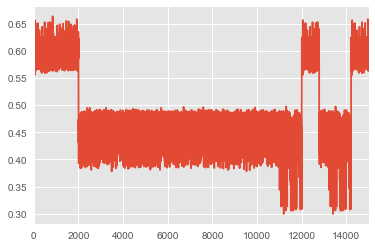

In [181]:
p_hat_low.plot()

In [182]:
c_hat_low = p_hat_low.round()

In [183]:
pd.crosstab(c_hat_low,
    cs.low,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class             0     1
Hypothesized Class            
0.0                 6284  5144
1.0                 1399  2172

# Medium#

In [184]:
model_medium = linear_model.LogisticRegression().\
    fit(X, cs.medium)

print model_medium.coef_
print model_medium.intercept_

[[  5.87803096e-02  -3.39096404e-01   3.93689194e-03   2.27998850e-04
    3.84389860e-02]]
[-0.43514138]


In [185]:
model_medium.score(X, cs.medium)

0.56850456697113139

In [186]:
logit_hat_medium = model_medium.intercept_ + \
    (X * model_medium.coef_[0]).sum(axis = 1)

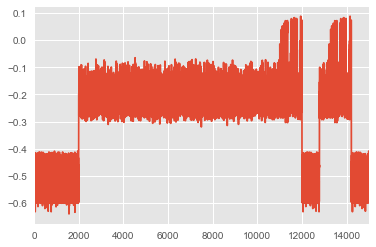

In [187]:
logit_hat_medium.plot()

In [188]:
((logit_hat_medium >= 0) == (cs.medium == 1)).mean()

0.56850456697113139

In [189]:
((logit_hat_medium >= 0) == (cs.medium == 1)).sum()

8527

In [190]:
((logit_hat_medium >= 0) != (cs.medium == 1)).sum()

6472

In [191]:
odds_hat_medium = np.exp(logit_hat_medium)

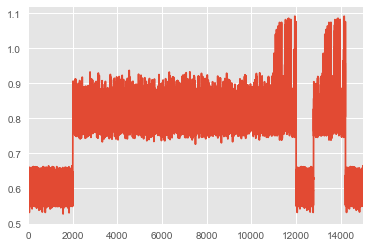

In [192]:
odds_hat_medium.plot()

In [193]:
p_hat_medium = odds_hat_medium / (1 + odds_hat_medium)

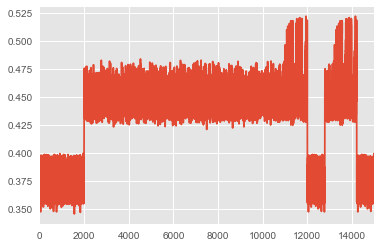

In [194]:
p_hat_medium.plot()

In [195]:
c_hat_medium = p_hat_medium.round()

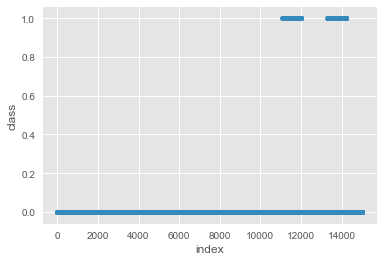

In [196]:
pd.DataFrame({'class': c_hat_medium, 'index': c_hat_medium.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

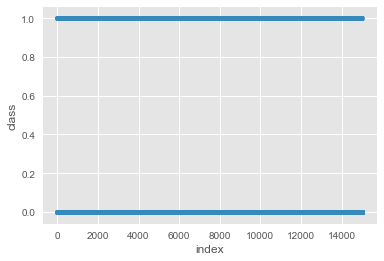

In [197]:
pd.DataFrame({'class': cs.medium, 'index': cs.medium.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

In [198]:
pd.crosstab(c_hat_medium,
    cs.medium,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class             0     1
Hypothesized Class            
0.0                 8431  6350
1.0                  122    96

# High#

In [199]:
model_high = linear_model.LogisticRegression().\
    fit(X, cs.high)

print model_high.coef_
print model_high.intercept_

[[ -2.66239423e-01  -1.63187814e+00  -5.81652918e-02   9.91435697e-05
    1.10865675e-01]]
[-2.19752416]


In [200]:
model_high.score(X, cs.high)

0.9175278351890126

In [201]:
logit_hat_high = model_high.intercept_ + \
    (X * model_high.coef_[0]).sum(axis = 1)

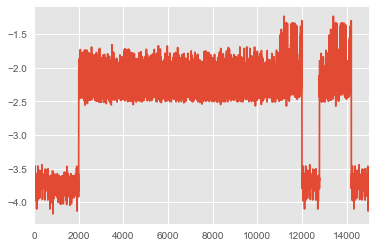

In [202]:
logit_hat_high.plot()

In [203]:
((logit_hat_high >= 0) == (cs.high == 1)).mean()

0.9175278351890126

In [204]:
((logit_hat_high >= 0) == (cs.high == 1)).sum()

13762

In [205]:
odds_hat_high = np.exp(logit_hat_high)

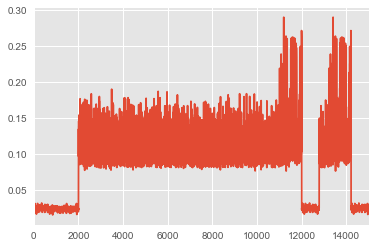

In [206]:
odds_hat_high.plot()

In [207]:
p_hat_high = odds_hat_high / (1 + odds_hat_high)

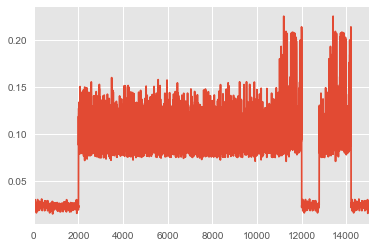

In [208]:
p_hat_high.plot()

In [209]:
c_hat_high = p_hat_high.round()

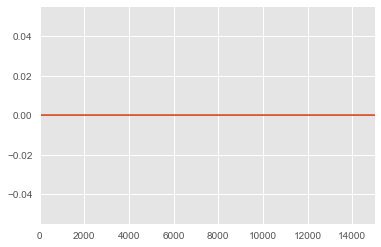

In [210]:
c_hat_high.plot()

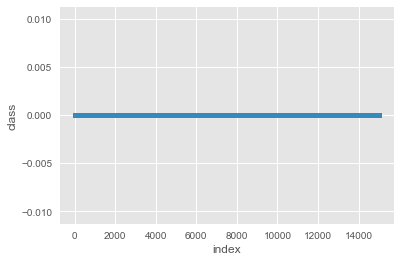

In [211]:
pd.DataFrame({'class': c_hat_high, 'index': c_hat_high.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

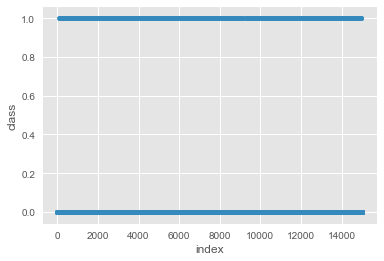

In [212]:
pd.DataFrame({'class': cs.high, 'index': cs.high.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

In [213]:
(c_hat_high == cs.high).sum()

13762

In [214]:
(c_hat_high != cs.high).sum()

1237

In [215]:
pd.crosstab(c_hat_high,
    cs.high,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class              0     1
Hypothesized Class             
0.0                 13762  1237

In [216]:
hats = pd.DataFrame({'Low': c_hat_low,
    'Medium': c_hat_medium,
    'High': c_hat_high})

In [217]:
hats.sum()

High         0.0
Low       3571.0
Medium     218.0
dtype: float64

In [218]:
hats.sum(axis = 1).value_counts()

0.0    11210
1.0     3789
dtype: int64

In [219]:
pd.crosstab([hats.Low, hats.High], hats.Medium)

Medium      0.0  1.0
Low High            
0.0 0.0   11210  218
1.0 0.0    3571    0

In [220]:
hats = pd.DataFrame({'p_Low': p_hat_low,
    'p_medium': p_hat_medium,
    'p_high': p_hat_high})

hats['p'] = hats.max(axis = 1)

hats['c'] = 'High'
hats.loc[hats.p_medium == hats.p, 'c'] = 'Medium'
hats.loc[hats.p_high == hats.p, 'c'] = 'High'

In [221]:
hats

p_Low    p_high  p_medium         p     c
0      0.622312  0.024157  0.355966  0.622312  High
1      0.566320  0.025530  0.397197  0.566320  High
2      0.610821  0.021980  0.371814  0.610821  High
3      0.590004  0.023306  0.384807  0.590004  High
4      0.622095  0.024224  0.355936  0.622095  High
...         ...       ...       ...       ...   ...
14994  0.622890  0.024018  0.355922  0.622890  High
14995  0.622022  0.024227  0.355988  0.622022  High
14996  0.623249  0.024187  0.355100  0.623249  High
14997  0.606296  0.023283  0.371321  0.606296  High
14998  0.622167  0.024222  0.355884  0.622167  High

[14999 rows x 5 columns]

In [222]:
(hats.c == c).mean()

0.0

In [223]:
(hats.c == c).sum()

0

In [224]:
(hats.c != c).mean()

1.0

In [225]:
pd.crosstab(
    hats.c,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class          high   low  medium
Hypothesized Class                    
High                 849  5860    4829
Medium               388  1456    1617

In [226]:
X = df[ ['satisfaction_level', 'left', 'number_project', 'average_montly_hours', 'time_spend_company'] ]
c = df.salary

model = linear_model.LogisticRegression().\
    fit(X, c)

In [227]:
model.score(X, c)

0.49849989999333288

In [228]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class          high   low  medium
Hypothesized Class                    
low                  849  5860    4829
medium               388  1456    1617